## **Calgary Crime Data Analysis**

This project aims to analyze and predict crime trends in Calgary using the Crime and Disorder Data provided by the City of Calgary’s official data portal. The dataset spans from 2018 to 2024, capturing monthly crime occurrences across various communities. Through detailed analysis, we seek to uncover underlying patterns and shifts in crime types, and ultimately develop a neural network model capable of forecasting future crime occurrences.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv(r"C:\Users\maria\Downloads\Community_Crime_Statistics_20240522.csv")

### **Exploratory Data Analysis**

In [26]:
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [28]:
df.shape

(70661, 5)

In [30]:
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


In [32]:
df['Community'].value_counts()

Community
BELTLINE                        628
FOREST LAWN                     587
DOWNTOWN COMMERCIAL CORE        562
MARLBOROUGH                     549
ALBERT PARK/RADISSON HEIGHTS    542
                               ... 
13A                               2
TWINHILLS                         2
12I                               1
13E                               1
01H                               1
Name: count, Length: 296, dtype: int64

In [34]:
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70661 entries, 0 to 70660
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    70661 non-null  object
 1   Category     70661 non-null  object
 2   Crime Count  70661 non-null  int64 
 3   Year         70661 non-null  int64 
 4   Month        70661 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.7+ MB


# **Data Visualization**

Total Crime incidents occured from 2018 - 2024 in Calgary - **201790**

In [40]:
df['Crime Count'].sum() #Total Crime

201790

**Crime Rate Distribution over Different Communitites**

**Beltline** records a **11.41%** crime rate, making it the most dangerous community, followed by **Forest lawn** **(10.66%)** and **Downtown Commercial Core** **(10.21%)**

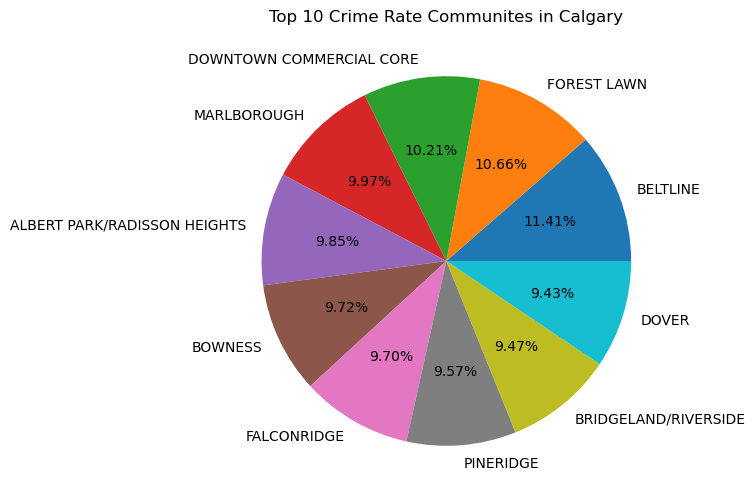

In [44]:
plt.figure(figsize=(6,6))
df['Community'].value_counts(ascending=False).head(10).plot(kind='pie',autopct='%1.2f%%')
plt.title('Top 10 Crime Rate Communites in Calgary')
plt.ylabel('')
plt.show()

**06B** records a **11.41%** crime rate, making it the most dangerous community, followed by **02K** **(13.64%)** and **02B** **(13.64%)**

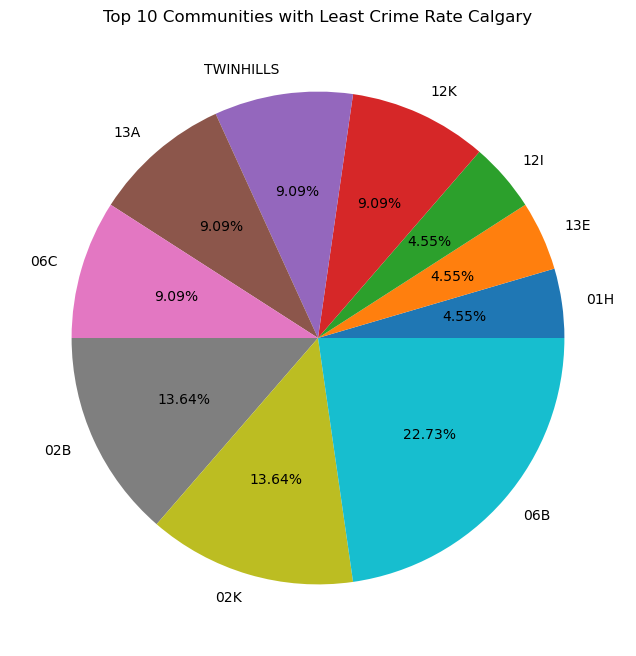

In [47]:
plt.figure(figsize=(8,8))
df['Community'].value_counts(ascending=True).head(10).plot(kind='pie',autopct='%1.2f%%')
plt.title('Top 10 Communities with Least Crime Rate Calgary')
plt.ylabel('')
plt.show()

**Crime Rate Distribution over Different Categories**

Theft from vehicles represented the largest share of reported crimes, followed by theft of vehicles.

Text(0.5, 1.0, 'Crime category Distribution')

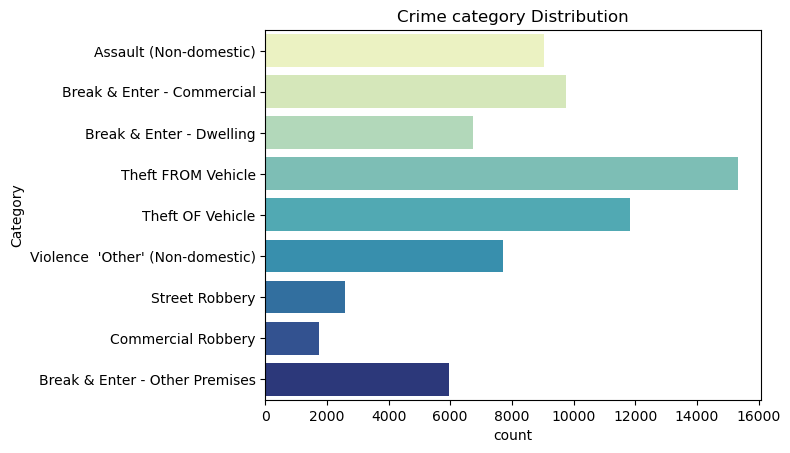

In [51]:
sns.countplot(data=df, y='Category', hue='Category' , palette = 'YlGnBu').set_title('Crime category Distribution')

**Crime Rate Trend**

Analysis shows that **January, March, and April** accounted for the highest overall crime rates.

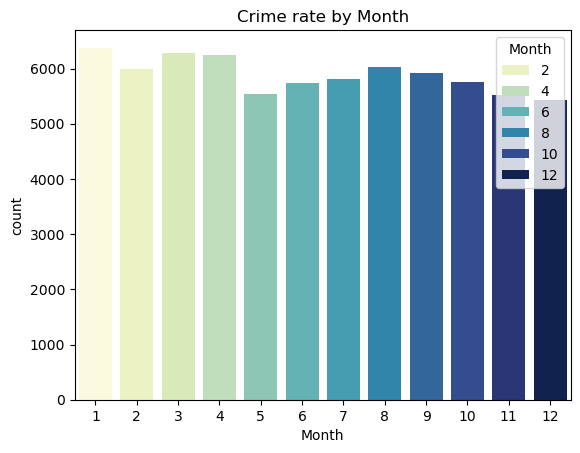

In [57]:
sns.countplot(x='Month', data = df, hue='Month' , palette = 'YlGnBu' )
plt.title('Crime rate by Month')
plt.show()

Crime rate peaked in **2019** followed by **2022** and **2018**

Text(0.5, 1.0, 'Crime Rate by Year')

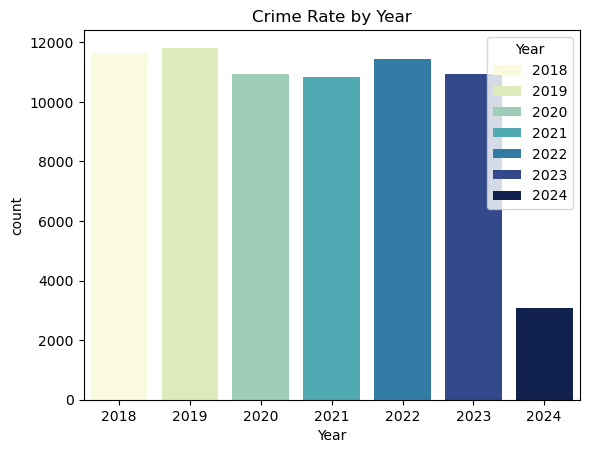

In [60]:
sns.countplot(x='Year', data=df, hue='Year', palette = 'YlGnBu')
plt.title('Crime Rate by Year')

The observed decline in 2024’s crime rate may be attributed to incomplete data collection

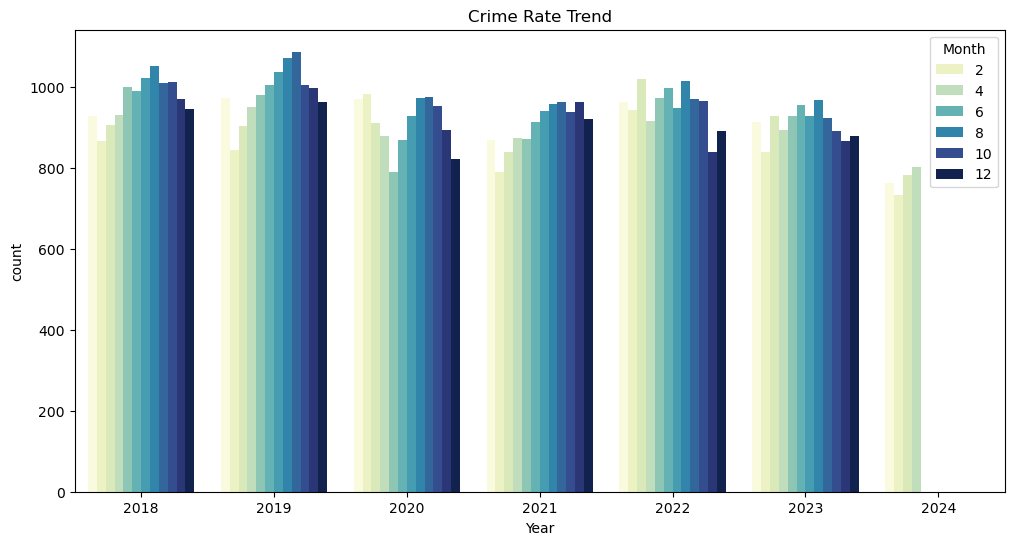

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Month', palette='YlGnBu').set_title('Crime Rate Trend')
plt.show()

**Crime Rate Analysis among different categories and communities**

Crime patterns varied across communities.
All communitites had relatively higher Assault, Theft from Vehicle and Theft of Vehicle crimes
Forest Lawn reported a high incidence of Break & Enter
Downtown Commercial Core recorded relatively low levels of Break & Enter

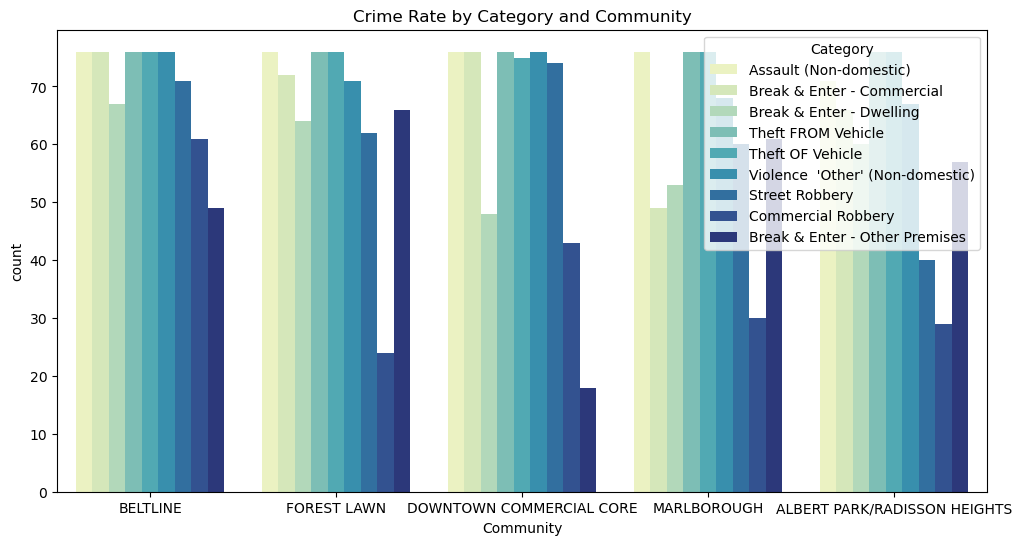

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Community', hue='Category', order=df['Community'].value_counts().head(5).index, palette='YlGnBu').set_title('Crime Rate by Category and Community')
plt.show()

Following analysis showed how crime categories varied over time, highlighting shifts and trends.

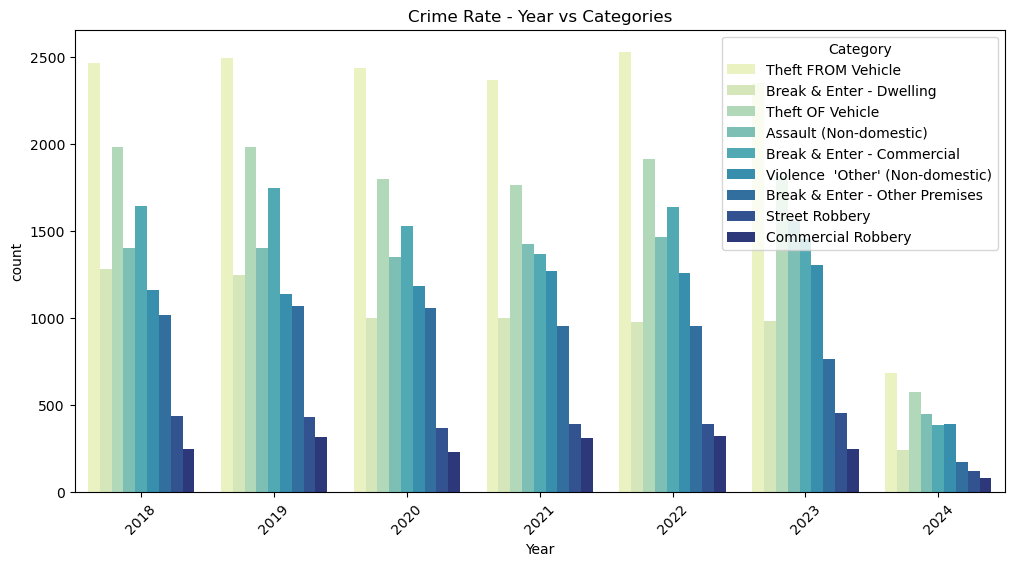

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Category', palette='YlGnBu').set_title('Crime Rate - Year vs Categories')
plt.xticks(rotation=45)
plt.show()